Task 1

Importing libraries

In [16]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


Creating a directed graph


In [3]:
G = nx.DiGraph()

Reading the data for Email communication links between members of the institution

In [4]:
with gzip.open('email-Eu-core.txt.gz', 'rt') as f:
    for line in f:
        sender, recipient = line.strip().split()
        sender = int(sender)
        recipient = int(recipient)
        G.add_edge(sender, recipient)

Reading data for Department membership labels

In [5]:
department_dict = {}

with gzip.open('email-Eu-core-department-labels.txt.gz', 'rt') as f:
    for line in f:
        node_str, dept_str = line.strip().split()
        node_id = int(node_str)
        dept_id = int(dept_str)
        department_dict[node_id] = dept_id


Attaching department labels to the graph


In [6]:
nx.set_node_attributes(G, department_dict, "department")

Degree distribution


In [7]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

Plotting histogram using matplotlib

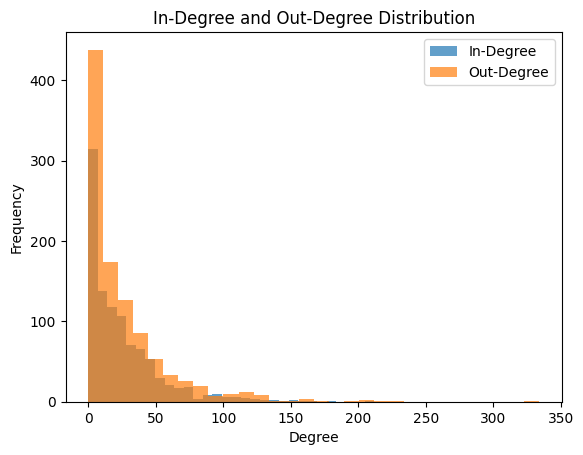

Average in-degree: 25.443781094527363
Average out-degree: 25.443781094527363
Max in-degree: 212
Max out-degree: 334


In [8]:
plt.hist(in_degrees, bins=30, alpha=0.7, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.7, label='Out-Degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title('In-Degree and Out-Degree Distribution')
plt.show()

#Numerical summaries
print("Average in-degree:", np.mean(in_degrees))
print("Average out-degree:", np.mean(out_degrees))
print("Max in-degree:", np.max(in_degrees))
print("Max out-degree:", np.max(out_degrees))

Clustering coefficient (undirected approximation)


In [9]:
G_undirected = G.to_undirected()
avg_clust = nx.average_clustering(G_undirected)
print("Average clustering (undirected):", avg_clust)

Average clustering (undirected): 0.3993549664221543


centrality measures


In [10]:
# Degree Centrality
deg_cent = nx.degree_centrality(G)  # dictionary {node: centrality}

# Betweenness Centrality
bet_cent = nx.betweenness_centrality(G, normalized=True)

# Closeness Centrality
close_cent = nx.closeness_centrality(G)

print(deg_cent)
print(bet_cent)
print(close_cent)

{0: 0.07270916334661355, 1: 0.05179282868525896, 2: 0.1603585657370518, 3: 0.11752988047808764, 4: 0.16235059760956175, 5: 0.2788844621513944, 6: 0.20119521912350596, 7: 0.11553784860557768, 8: 0.061752988047808766, 9: 0.05976095617529881, 10: 0.07470119521912351, 11: 0.13346613545816732, 12: 0.09561752988047809, 13: 0.23207171314741035, 14: 0.12749003984063745, 15: 0.08167330677290836, 16: 0.1145418326693227, 17: 0.16633466135458166, 18: 0.08764940239043825, 19: 0.11952191235059761, 20: 0.11752988047808764, 21: 0.23904382470119523, 22: 0.026892430278884463, 23: 0.13147410358565736, 24: 0.06274900398406374, 25: 0.049800796812749, 26: 0.052788844621513946, 27: 0.09561752988047809, 28: 0.17330677290836652, 29: 0.09362549800796813, 30: 0.11155378486055777, 31: 0.08167330677290836, 32: 0.054780876494023904, 33: 0.04282868525896414, 34: 0.04880478087649402, 35: 0.09661354581673307, 36: 0.06274900398406374, 37: 0.053784860557768925, 38: 0.0697211155378486, 39: 0.04880478087649402, 40: 0.1005

Exporting to Gephi

In [11]:
nx.write_gexf(G, "email_eu_core_with_depts.gexf")

Task 2

Top 10 Degree Centrality: [160, 121, 107, 62, 86, 82, 434, 183, 5, 129]
Top 10 Betweenness Centrality: [160, 86, 5, 121, 62, 107, 64, 82, 377, 129]
Top 10 Closeness Centrality: [160, 62, 107, 434, 121, 86, 64, 129, 183, 128]
Top 10 Eigenvector Centrality: [160, 107, 62, 434, 121, 183, 128, 256, 249, 129]
Top 10 PageRank: [1, 130, 160, 62, 86, 107, 365, 121, 5, 129]


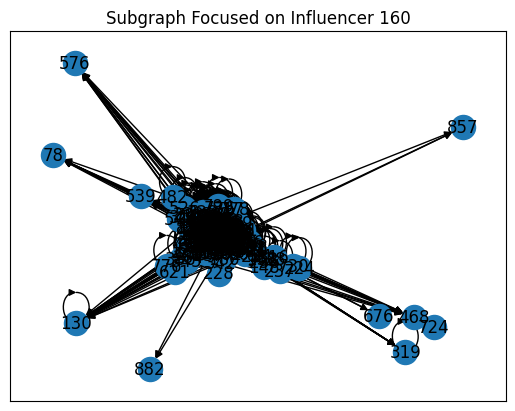

Original Largest WCC Size: 986
Largest WCC after removing top 5% PageRank nodes: 911
Largest WCC after removing top 10% PageRank nodes: 845
Largest WCC after removing top 20% PageRank nodes: 704


In [13]:

# Compute Additional Centrality Measures
try:
    eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    G_undirected = G.to_undirected()
    eigen_centrality = nx.eigenvector_centrality(G_undirected, max_iter=1000)

pagerank_scores = nx.pagerank(G, alpha=0.85)

# Compare Top Influencers
top_deg = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:10]
top_betw = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:10]
top_close = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:10]
top_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_pr = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Degree Centrality:", [n for n,_ in top_deg])
print("Top 10 Betweenness Centrality:", [n for n,_ in top_betw])
print("Top 10 Closeness Centrality:", [n for n,_ in top_close])
print("Top 10 Eigenvector Centrality:", [n for n,_ in top_eigen])
print("Top 10 PageRank:", [n for n,_ in top_pr])

# Analyse Key Influencers
influencer = top_eigen[0][0]
sub_nodes = set([influencer]) \
            .union(set(G.predecessors(influencer))) \
            .union(set(G.successors(influencer)))

subgraph_influencer = G.subgraph(sub_nodes)
pos = nx.spring_layout(subgraph_influencer)
nx.draw_networkx(subgraph_influencer, pos, with_labels=True)
plt.title(f"Subgraph Focused on Influencer {influencer}")
plt.show()

# 4. Evaluate Impact of Removing Central Nodes
def largest_wcc_size(graph):
    # returns the size of largest weakly connected component in a directed graph
    return max(len(c) for c in nx.weakly_connected_components(graph))

sorted_by_pr = [n for (n, c) in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)]
G_copy = G.copy()

original_size_lcc = largest_wcc_size(G_copy)
print(f"Original Largest WCC Size: {original_size_lcc}")

# Remove top 5%
remove_count_5 = int(0.05 * G.number_of_nodes())
G_copy.remove_nodes_from(sorted_by_pr[:remove_count_5])
size_lcc_5 = largest_wcc_size(G_copy)
print(f"Largest WCC after removing top 5% PageRank nodes: {size_lcc_5}")

# Remove top 10%
G_copy_10 = G.copy()  # fresh copy if you want an independent measurement
remove_count_10 = int(0.10 * G.number_of_nodes())
G_copy_10.remove_nodes_from(sorted_by_pr[:remove_count_10])
size_lcc_10 = largest_wcc_size(G_copy_10)
print(f"Largest WCC after removing top 10% PageRank nodes: {size_lcc_10}")

# Remove top 20%
G_copy_20 = G.copy()  # fresh copy if you want an independent measurement
remove_count_20 = int(0.20 * G.number_of_nodes())
G_copy_20.remove_nodes_from(sorted_by_pr[:remove_count_20])
size_lcc_20 = largest_wcc_size(G_copy_20)
print(f"Largest WCC after removing top 20% PageRank nodes: {size_lcc_20}")


Task 3

Number of communities found: 28
Community 0 has 64 nodes.
Community 1 has 111 nodes.
Community 2 has 129 nodes.
Community 3 has 93 nodes.
Community 4 has 10 nodes.
Community 5 has 129 nodes.
Community 6 has 1 nodes.
Community 7 has 251 nodes.
Community 8 has 1 nodes.
Community 9 has 1 nodes.
Community 10 has 1 nodes.
Community 11 has 1 nodes.
Community 12 has 1 nodes.
Community 13 has 1 nodes.
Community 14 has 1 nodes.
Community 15 has 54 nodes.
Community 16 has 1 nodes.
Community 17 has 1 nodes.
Community 18 has 1 nodes.
Community 19 has 1 nodes.
Community 20 has 1 nodes.
Community 21 has 1 nodes.
Community 22 has 1 nodes.
Community 23 has 1 nodes.
Community 24 has 1 nodes.
Community 25 has 1 nodes.
Community 26 has 1 nodes.
Community 27 has 145 nodes.


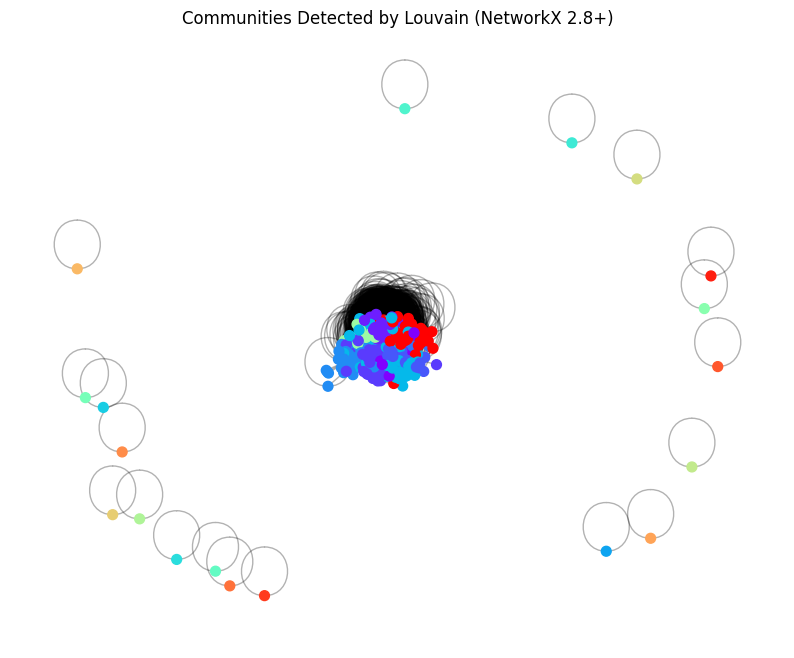

In [18]:
# Convert directed graph G to undirected
G_undirected = G.to_undirected()

# Perform Louvain Community Detection (NetworkX 2.8+)
from networkx.algorithms.community import louvain_communities
communities = louvain_communities(G_undirected, seed=42)

print(f"Number of communities found: {len(communities)}")
for i, cset in enumerate(communities):
    print(f"Community {i} has {len(cset)} nodes.")

# Assign community index to each node
comm_dict = {}
for i, cset in enumerate(communities):
    for node in cset:
        comm_dict[node] = i

# Create a list of colors for each node in G_undirected
node_colors = [comm_dict[n] for n in G_undirected.nodes()]

# Use a layout for visualization
pos = nx.spring_layout(G_undirected, seed=42)
plt.figure(figsize=(10, 8))

# 1) Get the 'rainbow' colormap
# 2) Resample it to have len(communities) distinct colors
cmap = matplotlib.colormaps["rainbow"].resampled(len(communities))

nx.draw_networkx_nodes(
    G_undirected, 
    pos, 
    node_color=node_colors, 
    cmap=cmap, 
    node_size=50
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

plt.title("Communities Detected by Louvain (NetworkX 2.8+)")
plt.axis("off")
plt.show()